# SALES PREDICTION USING Scikit-Learn, PANDAS AND NUMPY

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\Files-main\Files-main\Advertising.csv")
print(data.shape)
print(data.columns)
type(data)
#we have to predict sales

(200, 5)
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


pandas.core.frame.DataFrame

Data has 4 features TV,radio,newspaper and sale. The number of observations are 200. First 3 featuers are the advertisements shown in each sector (tv, newspaper or radio) and 4th feature i.e sales is the number of sales after the advertisement.

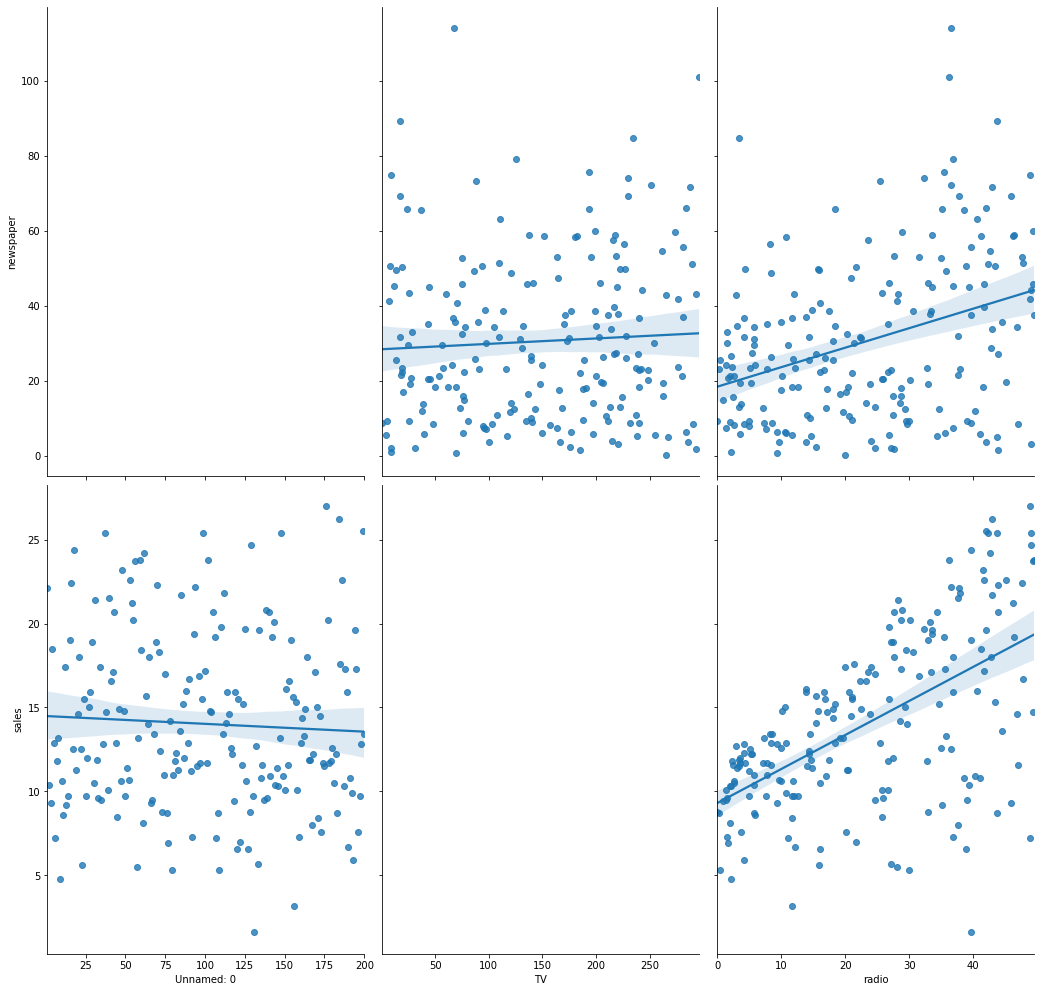

In [3]:
#plotting realtonship to understand relationship between features and result
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')


<AxesSubplot:xlabel='TV', ylabel='Density'>

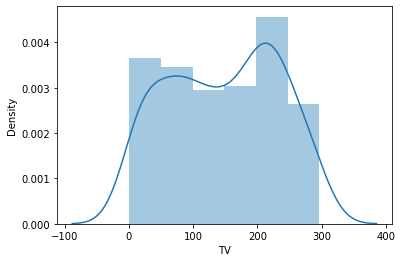

In [4]:
sns.distplot(data['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

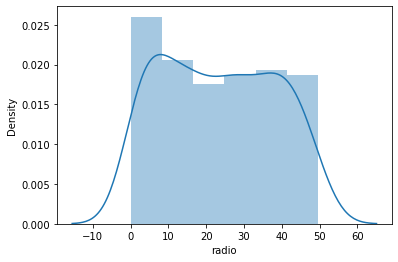

In [5]:
sns.distplot(data['radio'])

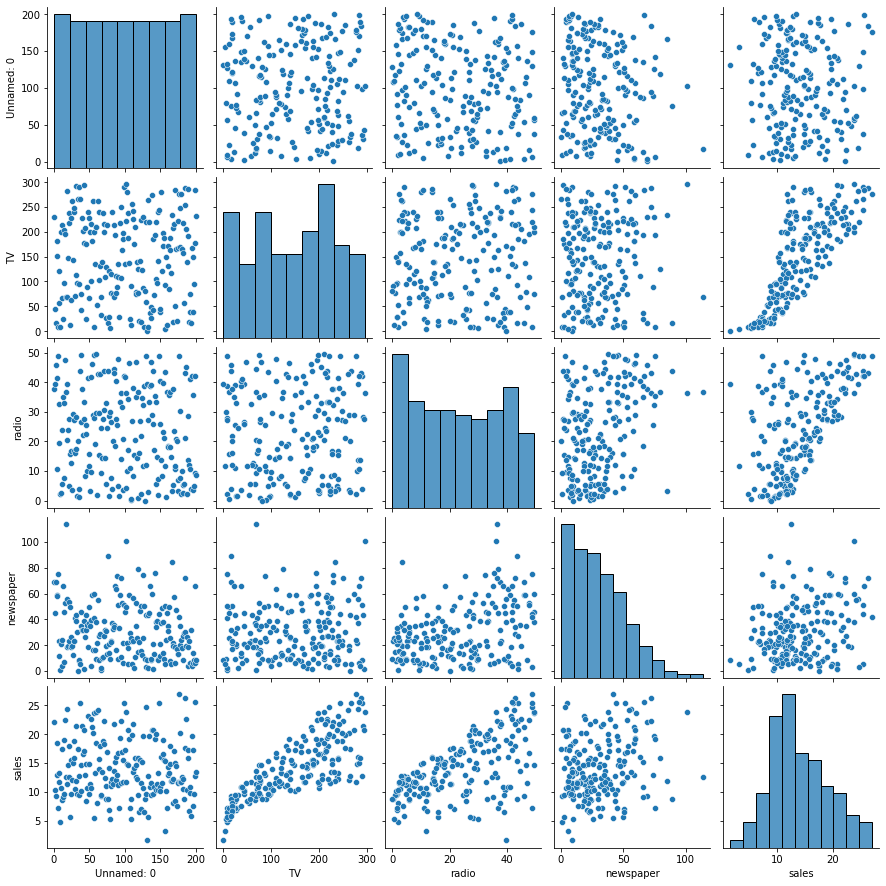

In [6]:
sns.pairplot(data)

<AxesSubplot:>

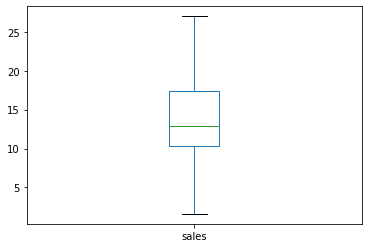

In [7]:
data['sales'].plot.box()

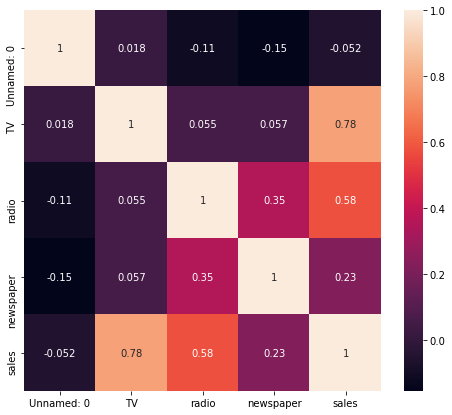

In [8]:
import matplotlib.pyplot as plt
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [11]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
X=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
Y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 2)
(80, 3)
(80, 2)


In [12]:
lnrg = LinearRegression()
lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)


linear regression bias or intercept   =>  [23.21374872  2.59004845]
linear regression coefficient         =>  [[-7.42138898e-02 -8.50367387e-03  5.66518691e-01]
 [-6.21901393e-05  4.77884542e-02  1.84024546e-01]]
feature columns                       =>  Index(['Unnamed: 0', 'TV', 'radio'], dtype='object')


In [13]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.7009140897859516

In [14]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.920754365944272

In [15]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9788597411920765

In [16]:
#all features
feature_cols = ['TV','radio','newspaper']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051792


In [17]:
# with some features
feature_cols = ['TV','radio']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766


 I found that TV advertisments has the huge Impact on sales, after that radio and then newspapaer has the lowest affect on the sales. Then I used linear regression model to predict the sales using different combination of features (considering the result we got in last of finding realtionship between features).ran linear regression 100 time and calculated the average mean squared error (used it as a metric to calculate error) which  is around 1.7 , I notice that when I used only TV and radio features to predcit sales, I get better result  when used all features. I tried cross validation techniques to find the best features for predicting the most accurate sales. I got 1.69 root mean squared error when I used all feature and 1.67 when I used only tv and radio.